In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from sklearn import metrics
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv1D, MaxPooling1D

In [ ]:
df = pd.read_csv('accidental-deaths-in-usa-monthly.csv')

In [ ]:
df.head()

,Month,Accidental deaths
0,1973-01,9007
1,1973-02,8106
2,1973-03,8928
3,1973-04,9137
4,1973-05,10017


In [ ]:
df.shape

(72, 2)

In [ ]:
data = df['Accidental deaths']

In [ ]:
def getXY(sequence, steps):
    X, Y = list(), list()
    for start in range(len(sequence)):
        end = start + steps
        if end > len(sequence) - 1:
            break
        
        X.append(sequence[start:end])
        Y.append(sequence[end])
    
    return np.array(X), np.array(Y)

In [ ]:
steps = 3
X, Y = getXY(data, steps)
print(X[:5])
print(X[:5])

[[ 9007  8106  8928]
 [ 8106  8928  9137]
 [ 8928  9137 10017]
 [ 9137 10017 10826]
 [10017 10826 11317]]
[[ 9007  8106  8928]
 [ 8106  8928  9137]
 [ 8928  9137 10017]
 [ 9137 10017 10826]
 [10017 10826 11317]]


In [ ]:
features = 1
X = X.reshape(X.shape[0], X.shape[1], features)

In [ ]:
print(X[:5])

[[[ 9007]
  [ 8106]
  [ 8928]]

 [[ 8106]
  [ 8928]
  [ 9137]]

 [[ 8928]
  [ 9137]
  [10017]]

 [[ 9137]
  [10017]
  [10826]]

 [[10017]
  [10826]
  [11317]]]


In [ ]:
split = -30
X_train, X_test = X[:split], X[split:]
Y_train, Y_test = Y[:split], Y[split:]

In [ ]:
model = Sequential([
        Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(steps, features)),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(500, activation='relu'),
        Dense(100, activation='relu'),
        Dense(500, activation='relu'),
        Dense(1)
    ])

In [ ]:
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2, 64)             192       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1, 64)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 500)               32500     
                                                                 
 dense_1 (Dense)             (None, 100)               50100     
                                                                 
 dense_2 (Dense)             (None, 500)               50500     
                                                        

In [ ]:
h = model.fit(X_train, Y_train, epochs=1000, verbose=0)

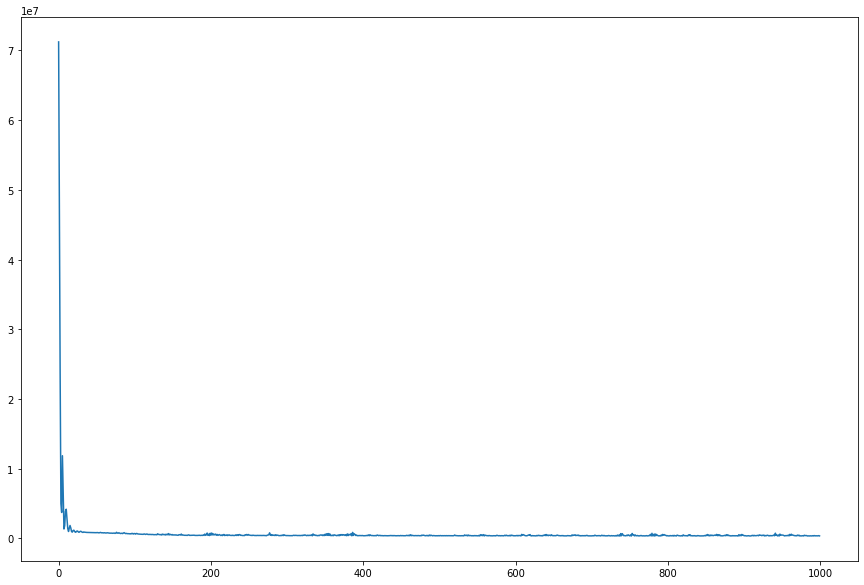

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(h.history['loss'])
plt.show()

In [ ]:
Y_pred = model.predict(X_test)

1/1 [==============================] - 0s 105ms/step


In [ ]:
def evaluation(y_true, y_pred):
    met = {}
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    met['MSE'] = metrics.mean_squared_error(y_true, y_pred)
    met['MAE'] = metrics.mean_absolute_error(y_true, y_pred)
    met['RMSE'] = np.sqrt(metrics.mean_squared_error(y_true, y_pred))
    met['MAPE'] = mean_absolute_percentage_error(y_true, y_pred)
    met['R2'] = metrics.r2_score(y_true, y_pred)

    data = pd.DataFrame(met, index=[0])
    print(data)

In [ ]:
evaluation(Y_test, Y_pred)

             MSE         MAE        RMSE       MAPE        R2
0  843780.806612  735.184717  918.575422  13.096992 -0.044894


In [ ]:
Y_pred = [i[0] for i in Y_pred]

In [ ]:
df = {'Y_test':Y_test, 'Y_pred':Y_pred}
df = pd.DataFrame(df, index = [i for i in range(len(Y_test))])
print(df)

    Y_test        Y_pred
0    10078   9133.130859
1     9179  10546.620117
2     8037   9835.488281
3     8488   8393.049805
4     7874   7999.686035
5     8647   8006.467773
6     7792   8362.480469
7     6957   8246.585938
8     7726   7146.336426
9     8106   7394.508789
10    8890   8403.074219
11    9299   9240.251953
12   10625   9552.677734
13    9302  11265.625000
14    8314  10243.331055
15    8850   8584.731445
16    8265   8316.291992
17    8796   8421.933594
18    7836   8375.033203
19    6892   8167.752930
20    7791   7201.404785
21    8129   7483.746094
22    9115   8518.807617
23    9434   9556.537109
24   10484   9823.946289
25    9827  10882.633789
26    9110  10313.826172
27    9070   9008.463867
28    8633   8549.531250
29    9240   8342.288086


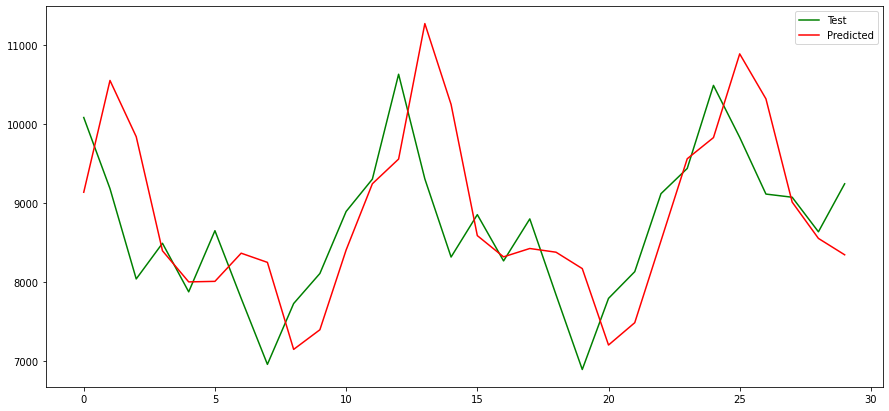

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(Y_test, color='g')
plt.plot(Y_pred, color='r')
plt.legend(['Test', 'Predicted'], loc='best')
plt.show()